### 15.066 Optimization Final Project Proposal (July 2021)
Lauren Heintz, Gabriel Pascualy, Logan Greene, Lisa Schleuter, Jomi Kramer, Nick Esposito  
LGO 2023  
August 14, 2021

<h1><center>OFF GRID HOUSING ENERGY</center></h1> 

## 1. Introduction

As the effects of global warming become increasingly apparent, people are considering living off the grid. Living off the grid means that you do not rely on public utilities for utilities like electricity, running water, sewer, natural gas, or heat, but rather you create your own energy. Currently, most people take a hybrid approach meaning that they utilize small capacity renewable energy products while still utilizing some public utilities.  

For many Americans, the deciding factor to transition to low-carbon electricity is that the cost of energy from these products must be cheaper than the energy produced by the grid coupled with the environmental impact associated with the implementation.  In the past, the cost of renewable energy products was very expensive making it financially impractical to make the transition due to high initial costs for the equipment. Over time, the financial benefit of renewable energy products can save a substantial amount of money on utilities while vastly decreasing the impact on the environment. Just a decade ago, it was much cheaper to build a new coal-burning power plant than it was to build a large capacity wind or solar plant. Since then, the price per MWh has declined by 89% for large capacity renewable energy sources which has trickled down into the smaller capacity renewable energy product market (Roser, 2020)1. Recently, reductions in the initial cost of renewable energy products have been spurred on by improvements in manufacturing processes and advances in technology which have made living off the grid more accessible to a wider range of income levels. As of 2017, approximately 180,000 families live off the grid which is expected to significantly increase every year (Infoplease, 2020)2. 

Our project aims to assist Americans considering living off the grid. We plan to develop a tool to help minimize the overall cost associated with off-grid products for a family’s energy needs based on the energy resources available. Depending on their location, people can input variables into the tool, such as average monthly electricity and heat demand, initial and monthly budget, and costs associated with renewable energy products and grid information. Based on these parameters, the tool will output the best combination of products (including utilizing the grid) and the optimal number of units of each product to meet demand while minimizing financial and environmental costs.  

## 2. Background
####  Demand
Demand Variations:
- Different locations (in a drop down list)
- show plots of solar efficiency and wind efficiency
- plots on weather
- different times of year (seasonal patterns)

#### Cost Structure
- define a generic power source and the cost structure associated with it
- ic, mc, oc

#### Power Sources
- explain solar (specs, etc)
- explain wind (specs, etc)
- explain batteries (specs, etc) 
- discussion the sample output from this tool: we want to know what mix of products and storage to buy
- discussion on the energy generation products and the storage needed, how it interacts
- explain all the storage variables here
- discussion/assumption of battery starting partially full *** 
- graph of line plots showing: demand, energy generated, energy stored, and grid power over the same x-axis of time
- pictures of turbine, solar panel, battery

## 3. Theoretical Formulation
- full list of decision vars, constraints, objective
- parameter list

### A. Demand
Let $m$ := be the month of the year where $m \in M$ where $M = \{{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}\}$

Let $h$ := be the hour of the day where $h \in H$ where $H = \{{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}\}$

Let $d_{m,h}$:= be the customer electricity demand in KwH during hour $h$ in month $m$  where $d_{m,h} \geq 0$

### B. Power Source Parameters
Let $j$ := be a product $j$ $\in$ $J$ where $J = \{{"smallsolar", "largesolar", "smallwind", "largewind", "smallbattery"}\}$

Let $E$ := be a set containing indices of products which generate electricity 

Let $S$ := be a set containing indices of products which store electricity 

Let $et$ := be an energy type where $et \in T = \{{"solar", "wind", "storage"}\}$

Let $ET_{et}$ := be a set containing all products of energy type $et$

Let $f: J \rightarrow ET_{et}$ := be a dictionary that maps a product $j$ to the set containing all products with the same energy type $et$

Let $oc_{j}$ := be the opening cost in US dollars of installing required infrastructure for product $j$ which belongs to an energy type $et$

Let $ic_j$ := be the incremental cost in US dollars of opening up an additional unit of a specific product $j$ where $ic_j \geq 0$

Let $mc_j$ := be the monthly cost in US dollars of maintaining one unit of product $j$ where $mc_j \geq 0$

Let $\rho_{m,h,j}$ := be the efficiency of product $j$ during hour $h$ in month $m$ where $\rho_{m,h,j}$ is continuous from 0 to 1

Let $c_{j}$ := be the capacity of product $j$ in KwH if it generates or stores electricity

Let $gc_{m,h}$ := be the cost of on-grid power in units of dollers per kilowatt hour

### C. Decision Variables
Let $x_j$ := be a binary variable representing whether or not the opening cost of $j$'s energy type is paid for where $x_j \in$ {0,1}

Let $y_{j}$ := be an integer variable representing the number of units of product $j$ where $y_j \geq$ 0

Let $g_{m,h}$ := be the continuous variable that represents the amount of power needed from the grid in kilowatt-hours during hour $h$ in month $m$.

Let $es_{m,h,j}$ := be the continuous variable that represents the amount of energy stored by product $j$ (note: not all products can store energy)

Let $sc_{m,h,j}$ := be the continuous variable that represents the amount of stored consumed from product $j$ (note: not all products can store energy)

### D. Calculated Variables

Let $ES_{m,h}$ := be the total energy stored this year through month $m$ and hour $h$ calculated by summing cumulative the energy stored each hour for all products $\sum_{j \in J} es_{m,h,j}$

Let $SC_{m,h}$ := be the total storage consumed this year through month $m$ and hour $h$ calculated by summing the cumulative energy consumed each hour for all products $\sum_{j \in J} sc_{m,h,j}$

Let $TT$ := be the total energy storage of the system calculated by summing the capacity of all products $\sum_{j \in J} c_{j}y_{j}$



### E. Objective Function
We want to minimize the cost; therefore, the objective function is the sum of the three kinds of costs:

    a) opening cost (oc) the cost of initially setting up a new service

    b) incremental cost (ic)
    
    c) monthly cost (mc)

    d) grid monthly cost (g)

$$\min \sum_{j \in J} oc_{j}x_j + \sum_{j \in J} ic_jy_j + \sum_{j \in J} mc_{j}y_{j}  + \sum_{m \in M} \sum_{h \in H} g_{m,h}$$

### F. Constraints

##### Demand Constraints
1) Meet customer demand for electricity per hour per month by summing the energy generation products ($E$) output, the stored energy ($S$) available, and grid power ($g$) available

$$\forall m \in M, \forall h \in H:  \sum_{j\in E} \rho_{m,h,j} y_{j} + \sum_{j\in S}sc_{m,h,j} + g_{m,h} \geq d_{m,h}$$

##### Budget Constraints
2) You have an initial budget of the amount of capital you have on hand to shell out for initial set up.
$$  \sum_{j \in J} oc_{j}x_j + \sum_{j \in J} ic_jy_j \leq $200,000 $$

3) You also have a monthly budget.
$$ \sum_{j \in J} mc_{j}y_{j} \leq $500 $$

##### Set up and Installation Constraints
4) Ensure at least 1 $x_j$ per energy type is 1 when any $y_j$ of the energy type is $\geq 1$

$$ \forall j \in ET_{solar}: \sum_{j' \in ET_{solar}} x_{j'} * M >= y_{j}$$

$$ \forall j \in ET_{wind}: \sum_{j' \in ET_{wind}} x_{j'} * M >= y_{j}$$

$$ \forall j \in ET_{storage}: \sum_{j' \in ET_{storage}} x_{j'} * M >= y_{j}$$

5) Ensure that at most 1 $x_j$ per energy type is equal to 1

$$ \forall et \in ET: \sum_{j\in ET_{et}}x_j \leq 1$$

##### Storage Constraints
6) Total storage consumed at hour $h$ during month $m$ cannot exceed electricity stored

$$ \forall m \in M, \forall h \in H\space: SC_{m,h} \leq ES_{m,h} $$ 

7) Storage available at hour $h$ during month $m$ cannot exceed total storage capacity

$$ \forall m \in M, \forall h \in H\space: ES_{m,h} - SC_{m,h}  \leq TT $$

8) Electricity stored at hour $h$ during month $m$ cannot exceed the sum of electricity produced, storage consumed, and grid usage minus demand at hour $h$ during month $m$ 

$$ \forall m \in M, \forall h \in H:\space \sum_{j\in S} es_{m,h,j} \leq \sum_{j\in E} \rho_{m,h,j} y_{j} + \sum_{j\in S} sc_{m,h,j} + g_{m,h} - d_{m,h} $$



## 4. Interface/Gui
- description of features & capability
- hosted on binder and accessible via github
- explanation of the visuals included in the output

## 5. Results
#### Sub Experiments
- compare the results of off grid cost over 1, 3, 5, 10, 20, 30 years to the cost of just grid power for those times (graphs)
- take total grid cost over 50 years (something larger than the amortization period), add constraint so that total cost of system over 50 years is equal to the total grid cost. 
    - make amortization a decision variable so that you can solve the minimization to minimize your amortization period to figure out the break even point
    - Solving for the break even point in terms of # of years, and factoring amortization in to that
- show different results for a few different regions of the country (differing demand)
- relax or tighten budget constraints (cheap, medium, expensive option)
    - show variation in budget and resulting plots of energy generated, energy needed from grid, mix of products purchased (as output by our optimization)
- run some variations where it is a seasonal vacation home and only use the demand for that period and see the results
- shadow prices
    - try to look at the shadow prices of the capital budget
    - shadow price of specific products?
- by adjusting the capital budget, see how the break even points varies (in terms of years)
- in discussion of results, use the size of the solar panels and space needed for wind turbines to output how much sqft or acreage is needed to support this amount of product
    - could also be implemented as a constraint too but TBD for now

## 6. Optimization Tool

In [1]:
import gurobipy as gp
from offgridoptimizer.interface import OffGridOptimizer
ogo = OffGridOptimizer()
ogo.load_sheets(None)

# ogo.product_table.add_row(None)

ogo.optimize(None)
ogo.interface

Changed value of parameter LogToConsole to 0
   Prev: 1  Min: 0  Max: 1  Default: 1
[140614032916096, 140614032871872, 140614032836352, 140614032836160]


Box(children=(Box(children=(HTML(value='<h2>Off-Grid Optimizer</h2>', layout=Layout(height='auto')), Box(child…

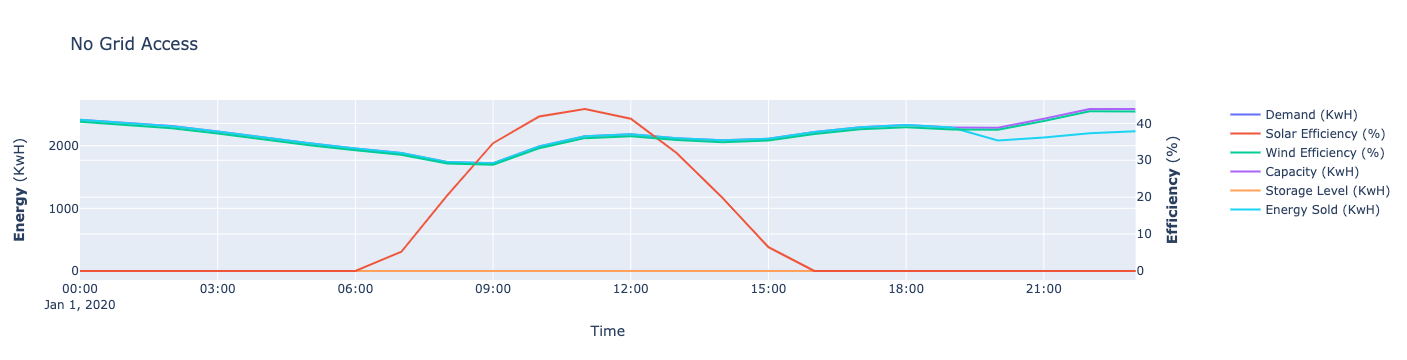

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# dataframe of a wide format
df = ogo.project.results_df()

df = df[df['month'] == 1]
# plotly.graph_objects
colors = px.colors.qualitative.Plotly
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Scatter(x=df['date'], y = df['demand'], mode = 'lines', line=dict(color=colors[0]), name='Demand (KwH)'), secondary_y=False)
fig.add_trace(go.Scatter(x=df['date'], y = df['pv_efficiency'] * 100, mode = 'lines', line=dict(color=colors[1]),
              name='Solar Efficiency (%)'),
              secondary_y=True)
fig.add_trace(go.Scatter(x=df['date'], y = df['wind_efficiency'] * 100, mode = 'lines', line=dict(color=colors[2]), 
              name='Wind Efficiency (%)'),
              secondary_y=True)
fig.add_trace(go.Scatter(x=df['date'], y = df['capacity'], mode = 'lines', line=dict(color=colors[3]), 
              name='Capacity (KwH)'),
              secondary_y=False)
fig.add_trace(go.Scatter(x=df['date'], y = df['storage_level'], mode = 'lines', line=dict(color=colors[4]), 
              name='Storage Level (KwH)'),
              secondary_y=False)
fig.add_trace(go.Scatter(x=df['date'], y = df['energy_sold'], mode = 'lines', line=dict(color=colors[5]), 
              name='Energy Sold (KwH)'),
              secondary_y=False)
fig.update_layout(title_text="No Grid Access")
fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="<b>Energy</b> (KwH)", secondary_y=False)
fig.update_yaxes(title_text="<b>Efficiency</b> (%)", secondary_y=True)

fig.show()

In [3]:
print(ogo.project.grid.allow_grid)
ogo.project.grid.grid_installed.x

True


1.0

In [4]:
import pandas as pd
import plotly.graph_objects as go

In [5]:
# # Configure functions to automate the data collection process

# # getStocks requires three variables:
# # - stocks is a list of strings which are the code for the stock
# # - history is timeframe of how much of the stock data is desired
# # - attribute is the attribute of the stock 
# def getStocks(stocks, history, attribute):
#     return pd.DataFrame({stock:yf.Ticker(stock).history(period=history)[attribute] for stock in stocks})

# # multi_plot requires two variables:
# # - df is a dataframe with stocks as columns and rows as date of the stock price
# # - addAll is to have a dropdown button to display all stocks at once
# def multi_plot(df, addAll = True):
#     fig = go.Figure()

#     for column in df.columns.to_list():
#         fig.add_trace(
#             go.Scatter(
#                 x = df.index,
#                 y = df[column],
#                 name = column
#             )
#         )

#     button_all = dict(label = 'All',
#                       method = 'update',
#                       args = [{'visible': df.columns.isin(df.columns),
#                                'title': 'All',
#                                'showlegend':True}])

#     def create_layout_button(column):
#         return dict(label = column,
#                     method = 'update',
#                     args = [{'visible': df.columns.isin([column]),
#                              'title': column,
#                              'showlegend': True}])

#     fig.update_layout(
#         updatemenus=[go.layout.Updatemenu(
#             active = 0,
#             buttons = ([button_all] * addAll) + list(df.columns.map(lambda column: create_layout_button(column)))
#             )
#         ])
    
#     fig.show()